In [32]:
import numpy as np
import pandas as pd 
from sklearn import linear_model

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import os
import tempfile
import typing
import s3fs
import tempfile
import geopandas as gpd

In [3]:
pip install GitPython

Note: you may need to restart the kernel to use updated packages.


In [33]:
#Récupération de la base de données
df = pd.read_csv("Clean_final.csv")
print(df.shape)

(2854, 12)


In [34]:
df.head()

,numéro_du_bien,adresse globale,adresse precise,arrondissement,prix de vente,prix du m2,date de vente,type de bien,nombre de pièces,surface du bien en m2,longitude,latitude
0,0.0,108 RUE SAINT-HONORE 75001 PARIS,108 RUE SAINT-HONORE,75001,1050100,15443,23/12/2021,0,3,68,2.342234,48.861488
1,1.0,229 RUE SAINT-DENIS 75002 PARIS,229 RUE SAINT-DENIS,75002,284550,11856,20/10/2021,0,1,24,2.351390,48.867194
2,2.0,52 RUE DE LA VERRERIE 75004 PARIS,52 RUE DE LA VERRERIE,75004,11000,204,20/10/2021,0,3,54,2.352524,48.858168
3,3.0,400 RUE SAINT-HONORE 75001 PARIS,400 RUE SAINT-HONORE,75001,210000,10500,23/09/2021,0,1,20,2.342234,48.861488
4,4.0,6 RUE DES MOULINS 75001 PARIS,6 RUE DES MOULINS,75001,265000,16562,24/08/2021,0,1,16,2.335052,48.866643


<AxesSubplot:xlabel='surface du bien en m2', ylabel='prix de vente'>

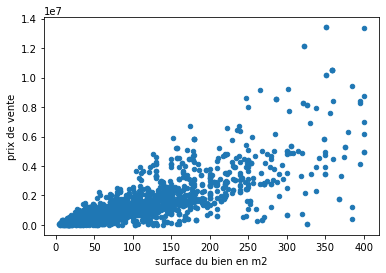

In [35]:
df.plot.scatter(x='surface du bien en m2',y='prix de vente')

<AxesSubplot:ylabel='arrondissement'>

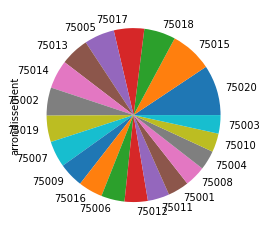

In [36]:
df["arrondissement"].value_counts(normalize=True).plot(kind='pie')


Text(0.5, 1.0, 'Matrice de corrélation entre les différentes caractéristiques des annonces\n')

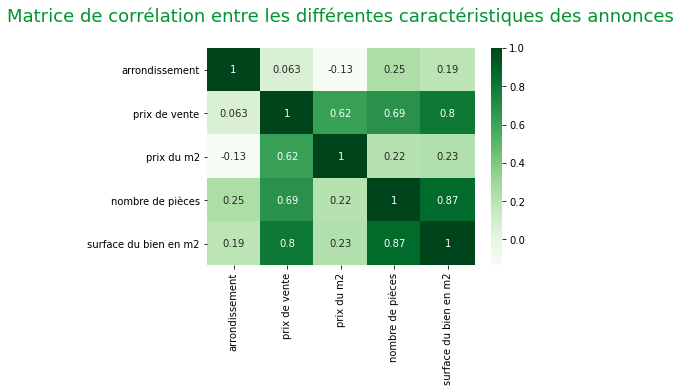

In [66]:
sns.heatmap(df2.corr(), annot=True, cmap='Greens')
plt.title("Matrice de corrélation entre les différentes caractéristiques des annonces\n", fontsize=18, color='#009432')

In [38]:
prix = df[['prix du m2','arrondissement']].groupby('arrondissement').mean().round().sort_values(by='prix du m2', ascending=False)
prix.reset_index(0, inplace=True)
prix.head()

,arrondissement,prix du m2
0,75016,17259.0
1,75007,16837.0
2,75006,15650.0
3,75014,12729.0
4,75001,12611.0


In [39]:
nbr = df[['prix de vente','arrondissement']].groupby('arrondissement').count().sort_values(by='prix de vente', ascending=False)
nbr.reset_index(0, inplace=True)
nbr.rename(columns={'prix de vente':'Nb_annonces'}, inplace=True)
nbr.head(22)

,arrondissement,Nb_annonces
0,75020,267
1,75015,223
2,75018,167
3,75017,161
4,75005,160
5,75013,152
6,75014,151
7,75002,149
8,75019,140
9,75007,139


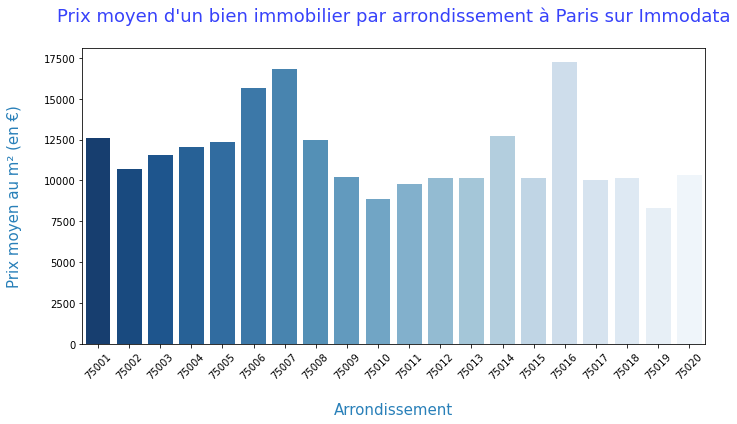

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x=prix['arrondissement'], y=prix['prix du m2'], palette="Blues_r")
plt.xlabel('\nArrondissement', fontsize=15, color='#2980b9')
plt.ylabel('Prix moyen au m² (en €)\n', fontsize=15, color='#2980b9')
plt.title("Prix moyen d'un bien immobilier par arrondissement à Paris sur Immodata\n", fontsize=18, color='#3742fa')
plt.xticks(rotation= 45)
plt.tight_layout()

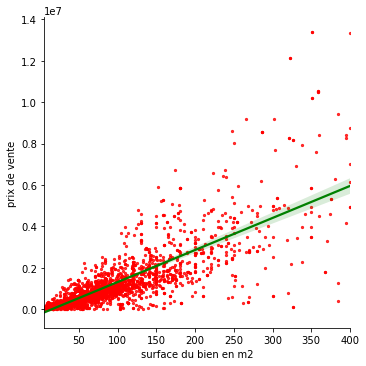

In [45]:
sns.lmplot(x = 'surface du bien en m2', y = 'prix de vente', data = df, scatter_kws = {'s': 5, 'color': 'red'}, line_kws = {'color': 'green'})

In [80]:
sns.set(rc={'figure.figsize':(16,8.27)})

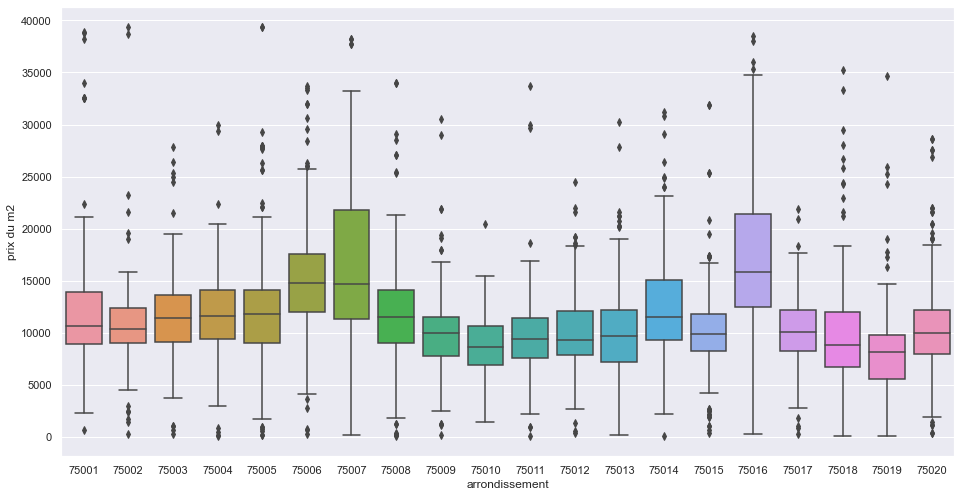

In [81]:
ax = sns.boxplot(x="arrondissement", y='prix du m2', data=df, orient="v")

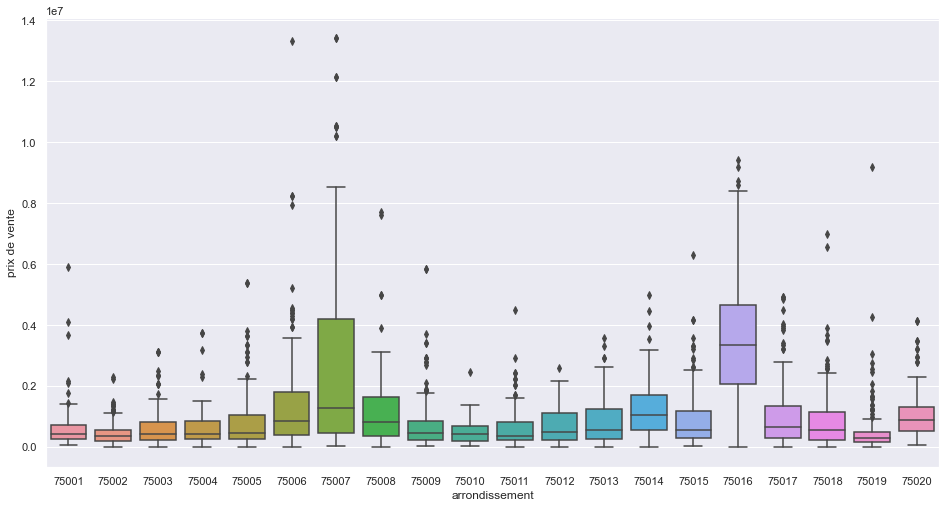

In [82]:
ax = sns.boxplot(x="arrondissement", y='prix de vente', data=df, orient="v")

In [83]:
df2 = df.copy()
df2.drop(['numéro_du_bien', 'adresse globale', 'adresse precise', 'type de bien', 'longitude', 'latitude'], axis = 1, inplace = True)

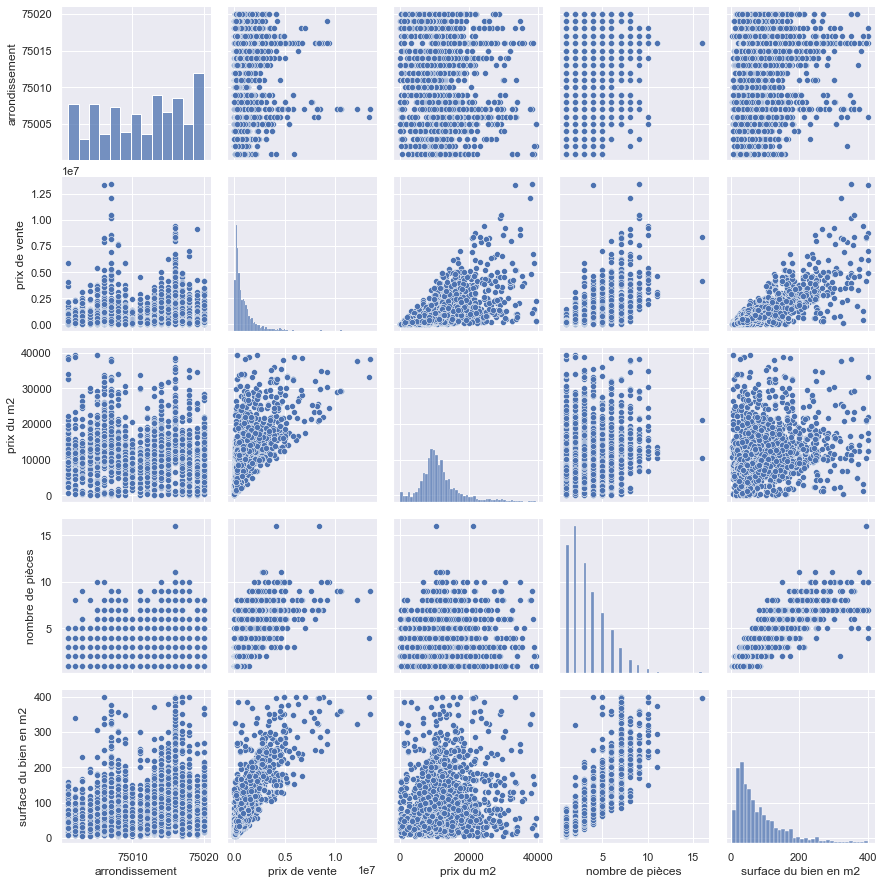

In [84]:
sns.pairplot(df2)